In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

### to change according to your machine
base_dir = os.path.expanduser("/home/data/lcz")
#path_training = os.path.join(base_dir, 'training.h5')
path_validation = os.path.join(base_dir, 'validation.h5')

#fid_training = h5py.File(path_training,'r')
fid_validation = h5py.File(path_validation,'r')

## we can have a look at which keys are stored in the file
## you will get the return [u'label', u'sen1', u'sen2']
## sen1 and sen2 means the satellite images
#print fid_training.keys()
print (fid_validation.keys())

### get s1 image channel data
### it is not really loaded into memory. only the indexes have been loaded.
#print ("-" * 60)
#print ("training part")
#s1_training = fid_training['sen1']
#print (s1_training.shape)
#s2_training = fid_training['sen2']
#print (s2_training.shape)
#label_training = fid_training['label']
#print (label_training.shape)

print ("-" * 60)
print ("validation part")
s1_validation = fid_validation['sen1']
print (s1_validation.shape)
s2_validation = fid_validation['sen2']
print (s2_validation.shape)
label_validation = fid_validation['label']
print (label_validation.shape)

KeysView(<HDF5 file "validation.h5" (mode r)>)
------------------------------------------------------------
validation part
(24119, 32, 32, 8)
(24119, 32, 32, 10)
(24119, 17)


In [2]:
## compute the quantity for each col
label_qty = np.sum(label_validation, axis=0)
min(label_qty)

202.0

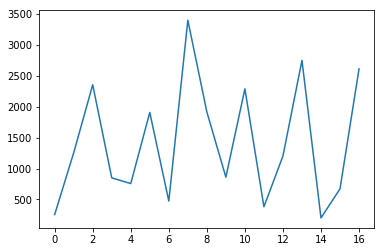

In [3]:
# visualization, plot the first pair of Sentinel-1 and Sentinel-2 patches of training.h5
import matplotlib.pyplot as plt
plt.plot(label_qty)

In [4]:
s1=[]
s2=[]
for i in range(17):
    idx=np.where(label_validation[:,i])[0][:202]
    s1.append(s1_validation[list(idx)])
    s2.append(s2_validation[list(idx)])
s1=np.concatenate(s1)
s2=np.concatenate(s2)
print(s1.shape,s2.shape)

(3434, 32, 32, 8) (3434, 32, 32, 10)


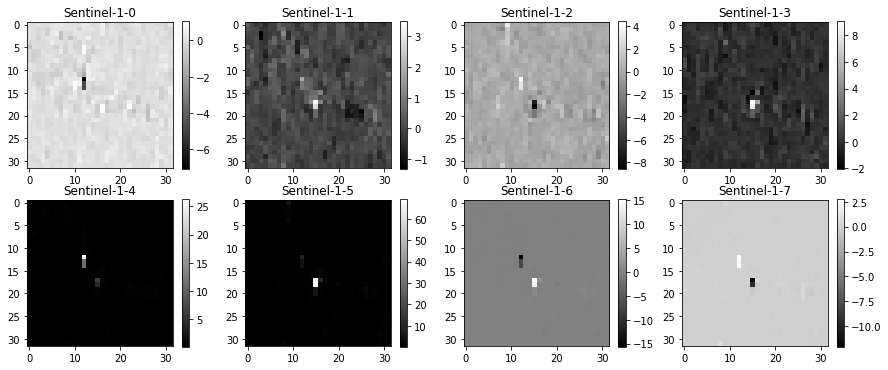

In [5]:
plt.subplots(figsize=(15, 6))

for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(s1[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1-%d'%(i))
plt.show()

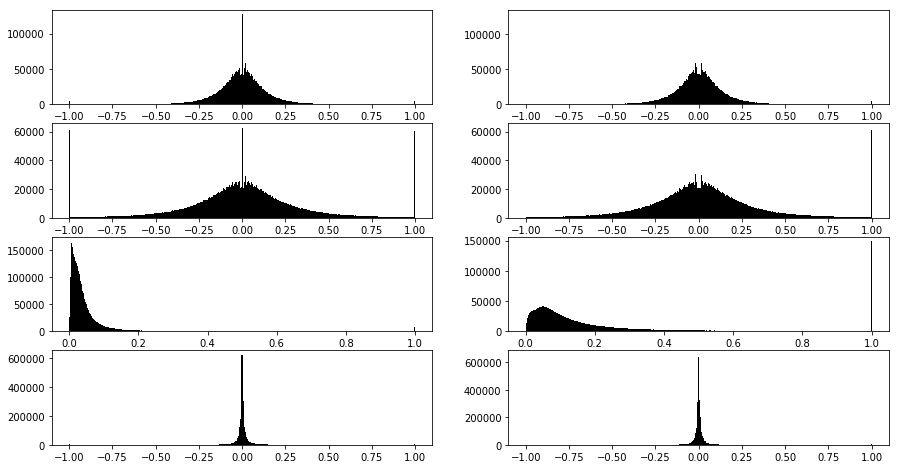

In [7]:
s1_=np.where(s1>1,1,s1)
s1_=np.where(s1_<-1,-1,s1_)
plt.subplots(figsize=(15,8))
for i in range(8):
    plt.subplot(4,2,i+1)
    s1_n=s1_[:,:,:,i].reshape([-1])
    plt.hist(s1_n, bins=500, color='k')
plt.show()

-3.0 1.4665461750549997
-2.3562264049886594 1.2036794897365892
-3.0 1.9951800994634448
-2.232915750460222 1.5992183157918411
-3.8306527401462893 2.602197409580565
-3.134431938880929 3.6640645834076753
-5.9067401787125045 3.0378040676317535
-4.189342153217279 2.3253463295541614


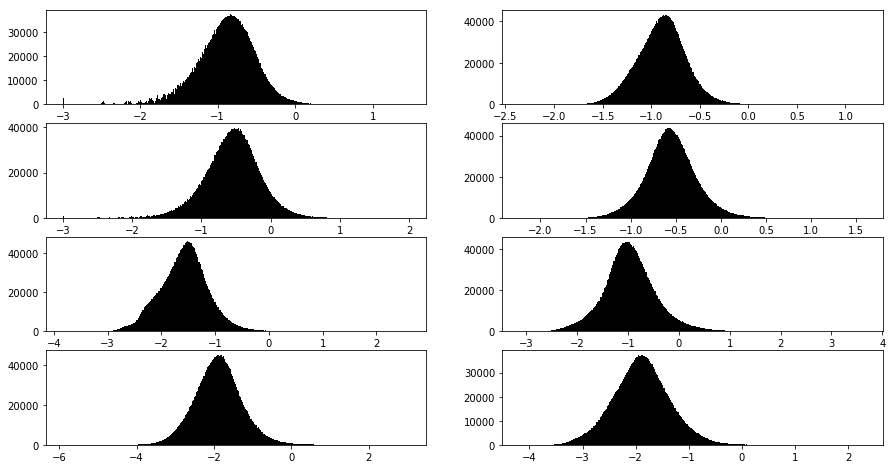

In [28]:
#s1_[:,:,:,0]=np.power(s1[:,:,:,0],2)+np.power(s1[:,:,:,1],2)
#print(np.min(np.where(s1_[:,:,:,0]==0,1,s1_[:,:,:,0])))
#print(np.min(np.where(s1_[:,:,:,0]==0,-1,s1_[:,:,:,0])))
#s1_[:,:,:,2]=np.power(s1[:,:,:,2],2)+np.power(s1[:,:,:,3],2)
#print(np.min(np.where(s1_[:,:,:,2]==0,1,s1_[:,:,:,2])))
#print(np.min(np.where(s1_[:,:,:,2]==0,-1,s1_[:,:,:,2])))
import cv2
s1_[:,:,:,0]=np.power(s1[:,:,:,0],2)+np.power(s1[:,:,:,1],2)
s1_[:,:,:,0]=0.5*np.log10(np.where(s1_[:,:,:,0]==0, 1.0e-6, s1_[:,:,:,0]))
for i in range(3434):
    s1_[i,:,:,1]=cv2.blur(s1_[i,:,:,0],(3,3))
#print(np.min(s1_[:,:,:,1]))
s1_[:,:,:,2]=np.power(s1[:,:,:,2],2)+np.power(s1[:,:,:,3],2)
s1_[:,:,:,2]=0.5*np.log10(np.where(s1_[:,:,:,2]==0, 1.0e-6, s1_[:,:,:,2]))
for i in range(3434):
    s1_[i,:,:,3]=cv2.blur(s1_[i,:,:,2],(3,3))
s1_[:,:,:,6]=0.5*np.log10(np.power(s1[:,:,:,6],2)+np.power(s1[:,:,:,7],2))
for i in range(3434):
    s1_[i,:,:,7]=cv2.blur(s1_[i,:,:,6],(3,3))
s1_[:,:,:,4:6]=np.log10(s1[:,:,:,4:6])
plt.subplots(figsize=(15,8))
for i in range(8):
    plt.subplot(4,2,i+1)
    s1_n=s1_[:,:,:,i].reshape([-1])
    print(np.min(s1_n),np.max(s1_n))
    plt.hist(s1_n, bins=500, color='k')
plt.show()

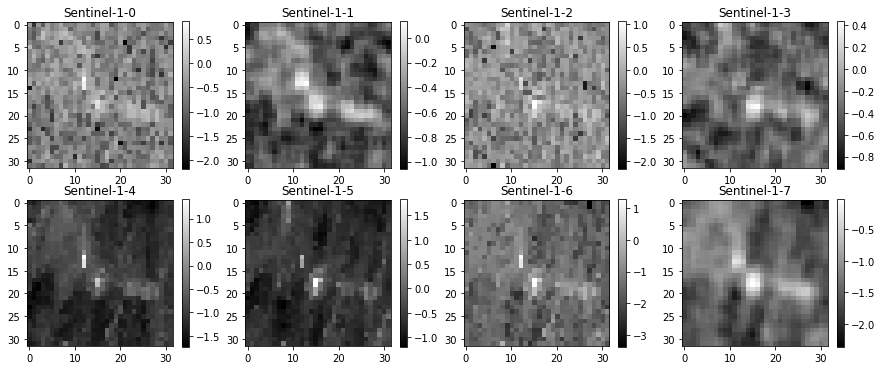

In [29]:
plt.subplots(figsize=(15, 6))

for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(s1_[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1-%d'%(i))
plt.show()

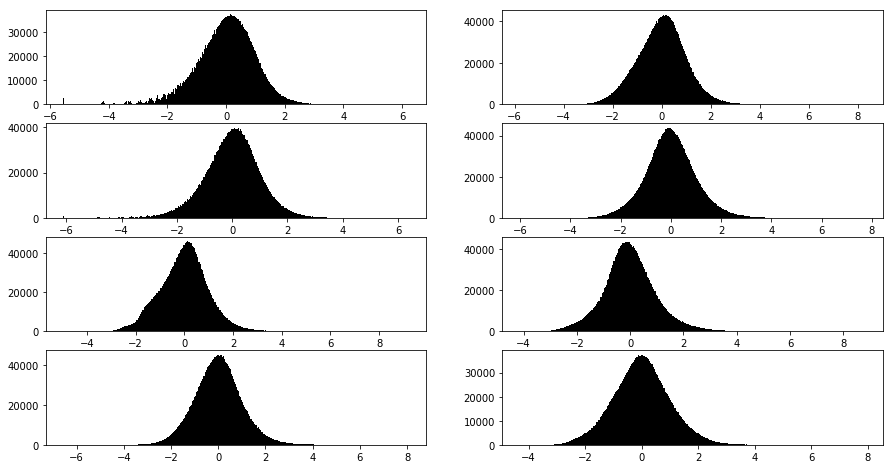

In [30]:
plt.subplots(figsize=(15,8))
for i in range(8):
    plt.subplot(4,2,i+1)
    mean = np.mean(s1_[:,:,:,i])
    std = np.std(s1_[:,:,:,i])
    s1_[:,:,:,i]=(s1_[:,:,:,i]-mean)/std
    plt.hist(s1_[:,:,:,i].reshape([-1]), bins=500, color='k')
plt.show()

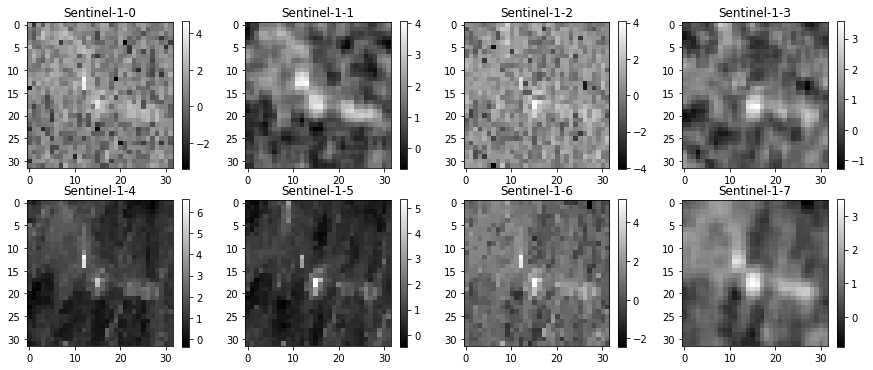

In [31]:
plt.subplots(figsize=(15, 6))

for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(s1_[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1-%d'%(i))
plt.show()

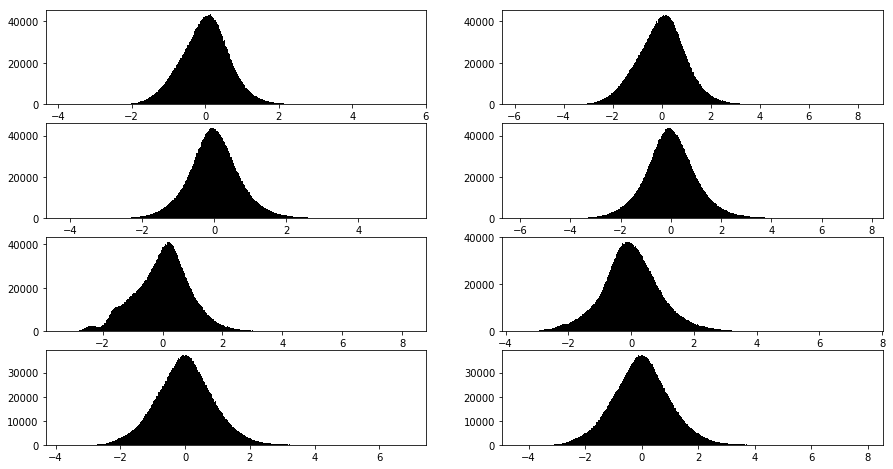

In [32]:
for i in range(3434):
    s1_[i,:,:,0]=cv2.blur(s1_[i,:,:,0],(3,3))
for i in range(3434):
    s1_[i,:,:,2]=cv2.blur(s1_[i,:,:,2],(3,3))
for i in range(3434):
    for j in range(4,7):
        s1_[i,:,:,j]=cv2.blur(s1_[i,:,:,j],(3,3))
plt.subplots(figsize=(15,8))
for i in range(8):
    plt.subplot(4,2,i+1)
    s1_n=s1_[:,:,:,i].reshape([-1])
    plt.hist(s1_n, bins=500, color='k')
plt.show()

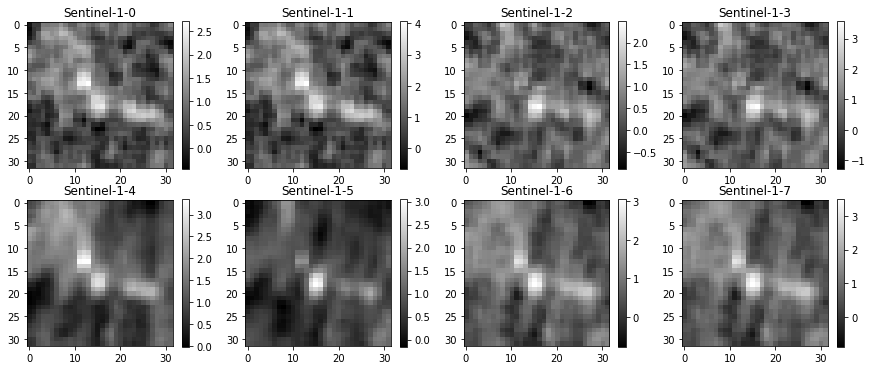

In [33]:
plt.subplots(figsize=(15, 6))

for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(s1_[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1-%d'%(i))
plt.show()

0.0001 2.7457
0.0001 2.8
0.0001 2.8
0.0001 2.4563
0.0001 1.8773
0.0001 2.2039
0.0103 2.8
0.0001 2.5546
0.001 1.9599
0.0001 2.02


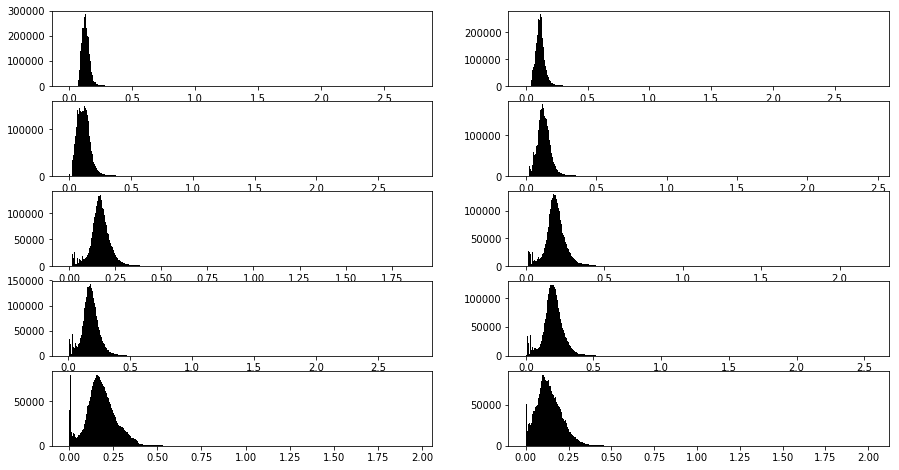

In [34]:
#s2_=np.where(s2>0.5,0.5,s2)
plt.subplots(figsize=(15,8))
for i in range(10):
    plt.subplot(5,2,i+1)
    s2_n=s2[:,:,:,i].reshape([-1])
    print(np.min(s2_n),np.max(s2_n))
    plt.hist(s2_n, bins=500, color='k')
plt.show()

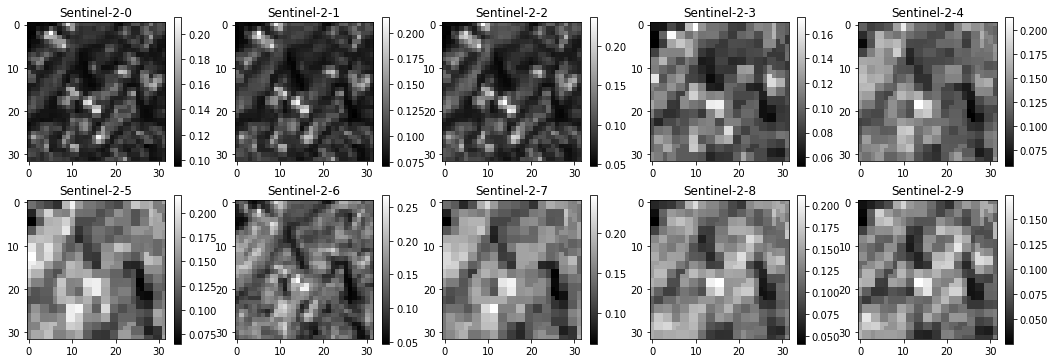

In [37]:
plt.subplots(figsize=(18, 6))

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(s2[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-2-%d'%(i))
plt.show()

-4.0 0.4386530837157114
-4.0 0.4471580313422192
-4.0 0.4471580313422192
-4.0 0.390281408229663
-4.0 0.2735336801512977
-4.0 0.3431918849014073
-1.9871627752948278 0.4471580313422192
-4.0 0.40732290783963865
-3.0 0.292233912909475
-4.0 0.3053513694466238


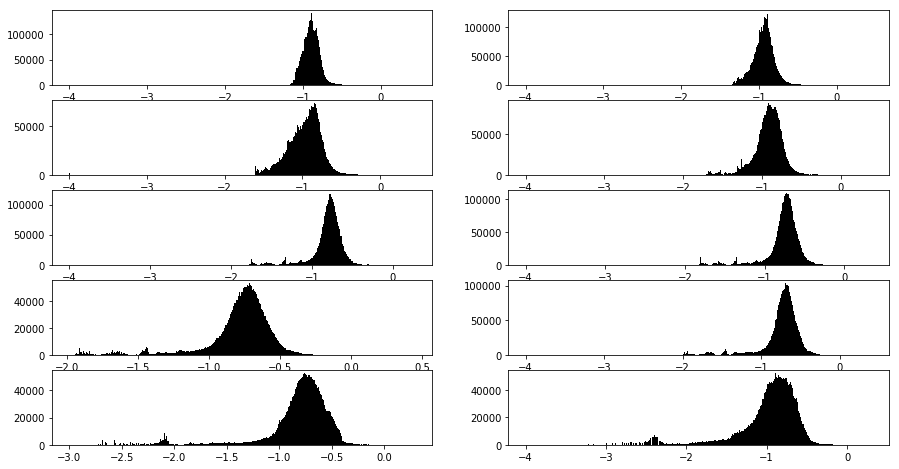

In [38]:
s2_=np.log10(s2)
plt.subplots(figsize=(15,8))
for i in range(10):
    plt.subplot(5,2,i+1)
    s2_n=s2_[:,:,:,i].reshape([-1])
    print(np.min(s2_n),np.max(s2_n))
    plt.hist(s2_n, bins=500, color='k')
plt.show()

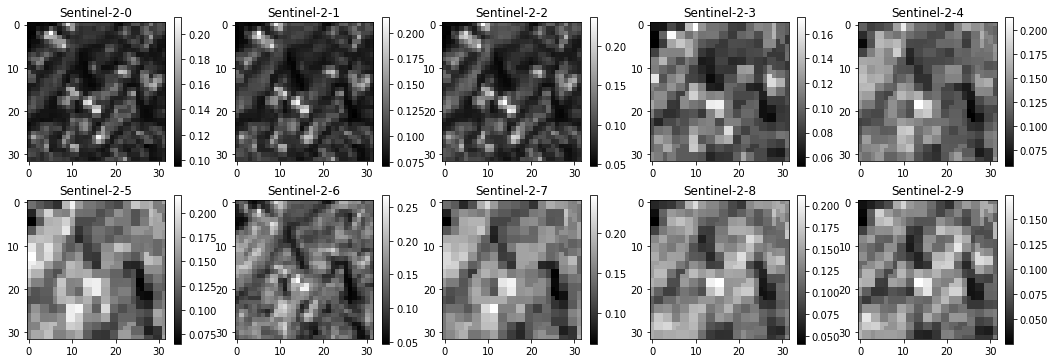

In [39]:
plt.subplots(figsize=(18, 6))

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(s2_[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-2-%d'%(i))
plt.show()

-1.3015967749816435 -0.07431022423919836
-4.0 -0.03218641821477976
-4.000000000000001 0.11162667673797545
-3.1111606731483725 0.11400741009749553
-2.905415538889157 0.1432332289572594
-2.1885902151451853 0.2681379440817489
-1.950408305127351 0.18597117248265416
-2.0253689258039866 0.23725876784965116
-2.8812226901020184 0.1732975542336659
-4.0 0.13992327669308469


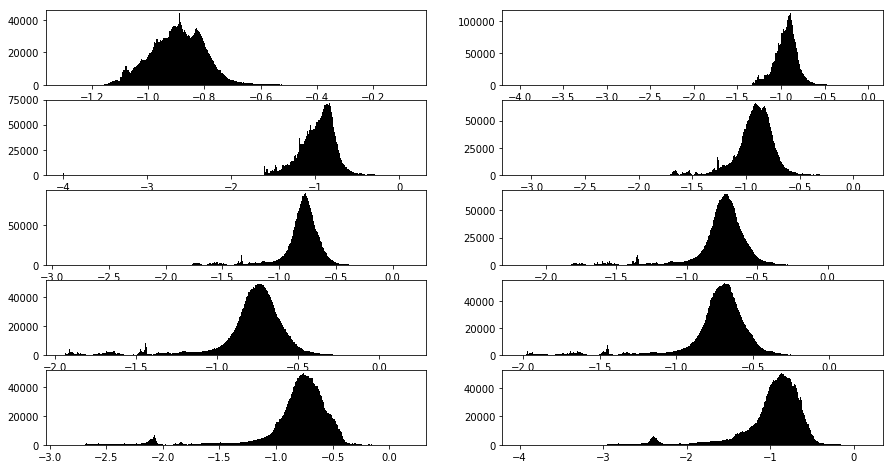

In [40]:
for i in range(3434):
    for j in range(10):
        s2_[i,:,:,j]=cv2.blur(s2_[i,:,:,j],(3,3))
plt.subplots(figsize=(15,8))
for i in range(10):
    plt.subplot(5,2,i+1)
    s2_n=s2_[:,:,:,i].reshape([-1])
    print(np.min(s2_n),np.max(s2_n))
    plt.hist(s2_n, bins=500, color='k')
plt.show()

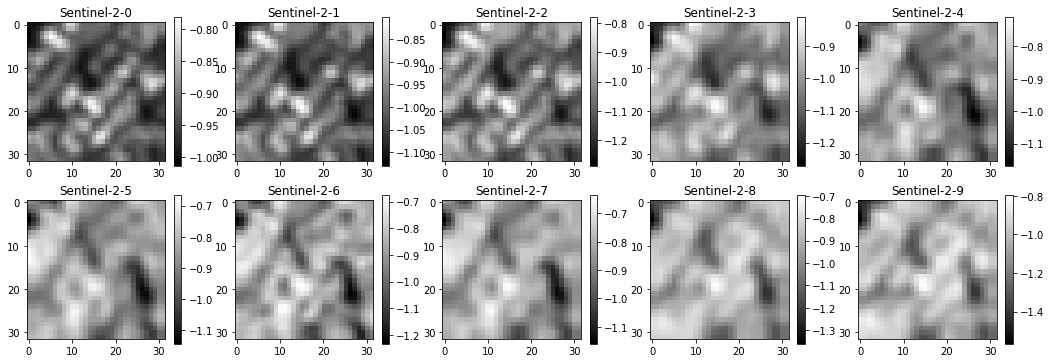

In [41]:
plt.subplots(figsize=(18, 6))

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(s2_[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-2-%d'%(i))
plt.show()

-1.1757294977004003 0.09549867794986015
-4.000000000000001 0.1701443226433564
-4.000000000000353 0.22286381154418602
-1.8087353380296616 0.20263360249488604
-1.784568075380518 0.1574063947093703
-1.8466933796946385 0.27846651616608886
-1.9494913538483238 0.27634945009270273
-2.020249345608083 0.2835826246844521
-2.8608208242770896 0.18639121569549313
-4.0 0.14986887025964357


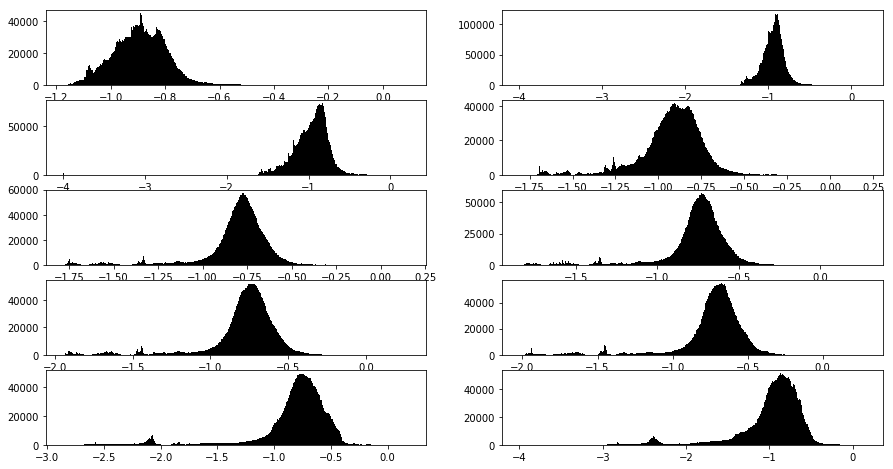

In [42]:
for i in range(3434):
    for j in range(10):
        s2_[i,:,:,j]=cv2.blur(s2[i,:,:,j],(3,3))
s2_=np.log10(s2_)
plt.subplots(figsize=(15,8))
for i in range(10):
    plt.subplot(5,2,i+1)
    s2_n=s2_[:,:,:,i].reshape([-1])
    print(np.min(s2_n),np.max(s2_n))
    plt.hist(s2_n, bins=500, color='k')
plt.show()

In [86]:
s1_=s1.reshape([-1,8])
s2_=s2_nor.reshape([-1,10])
s1_std=[np.max(s1_,0),np.min(s1_,0),np.mean(s1_,0),np.std(s1_,0)]
s2_std=[np.max(s2_,0),np.min(s2_,0),np.mean(s2_,0),np.std(s2_,0)]
s1_std,s2_std

([array([  15.36975002,   20.65049553,   56.73969269,   29.31453323,
          400.12658691, 4613.86181641,  335.03112793,  879.69989014]),
  array([-2.80124874e+01, -2.09875145e+01, -6.38304863e+01, -9.65072174e+01,
          1.47688697e-04,  7.33783701e-04, -6.45209839e+02, -2.49361710e+02]),
  array([-1.31680107e-04, -4.88908141e-06,  5.12196703e-04, -2.16476281e-04,
          5.53130441e-02,  3.18162627e-01,  1.16714403e-03,  1.84725682e-03]),
  array([0.19676043, 0.19696308, 0.50251822, 0.50178117, 0.76079854,
         4.53005392, 0.95433871, 0.77154316])],
 [array([0.61   , 0.61   , 0.61   , 0.60563, 0.54773, 0.58039, 0.61   ,
         0.61   , 0.55599, 0.562  ]),
  array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0103, 0.0001,
         0.001 , 0.0001]),
  array([0.1315846 , 0.11975383, 0.1179994 , 0.12906316, 0.16734989,
         0.18818464, 0.1810248 , 0.20179141, 0.18081133, 0.13477051]),
  array([0.0343778 , 0.03924315, 0.05384612, 0.04959969, 0.05566653,
         0.0

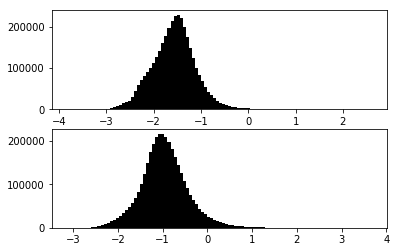

In [87]:
s1_46=np.log10(s1[:,:,:,4:6])
for i in range(2):
  plt.subplot(2,1,i+1)
  plt.hist(s1_46[:,:,:,i].reshape([-1]), bins=100, color='k')
plt.show()

In [88]:
s1_46std=s1_46.reshape([-1,2])
s1_46std=[np.max(s1_46std,0),np.min(s1_46std,0),np.mean(s1_46std,0),np.std(s1_46std,0)]
print(s1_46std)

[array([2.60219741, 3.66406458]), array([-3.83065274, -3.13443194]), array([-1.57260346, -0.95843714]), array([0.4531282 , 0.52381222])]


In [89]:
s1_mean=np.concatenate([s1_std[2][:4],s1_46std[2],s1_std[2][6:]])
s2_mean=s2_std[2]
s1_stdd=np.concatenate([s1_std[3][:4],s1_46std[3],s1_std[3][6:]])
s2_stdd=s2_std[3]
s1_mean,s1_stdd,s2_mean,s2_stdd

(array([-1.31680107e-04, -4.88908141e-06,  5.12196703e-04, -2.16476281e-04,
        -1.57260346e+00, -9.58437137e-01,  1.16714403e-03,  1.84725682e-03]),
 array([0.19676043, 0.19696308, 0.50251822, 0.50178117, 0.4531282 ,
        0.52381222, 0.95433871, 0.77154316]),
 array([0.1315846 , 0.11975383, 0.1179994 , 0.12906316, 0.16734989,
        0.18818464, 0.1810248 , 0.20179141, 0.18081133, 0.13477051]),
 array([0.0343778 , 0.03924315, 0.05384612, 0.04959969, 0.05566653,
        0.06556533, 0.06945987, 0.07402925, 0.08405288, 0.07621804]))

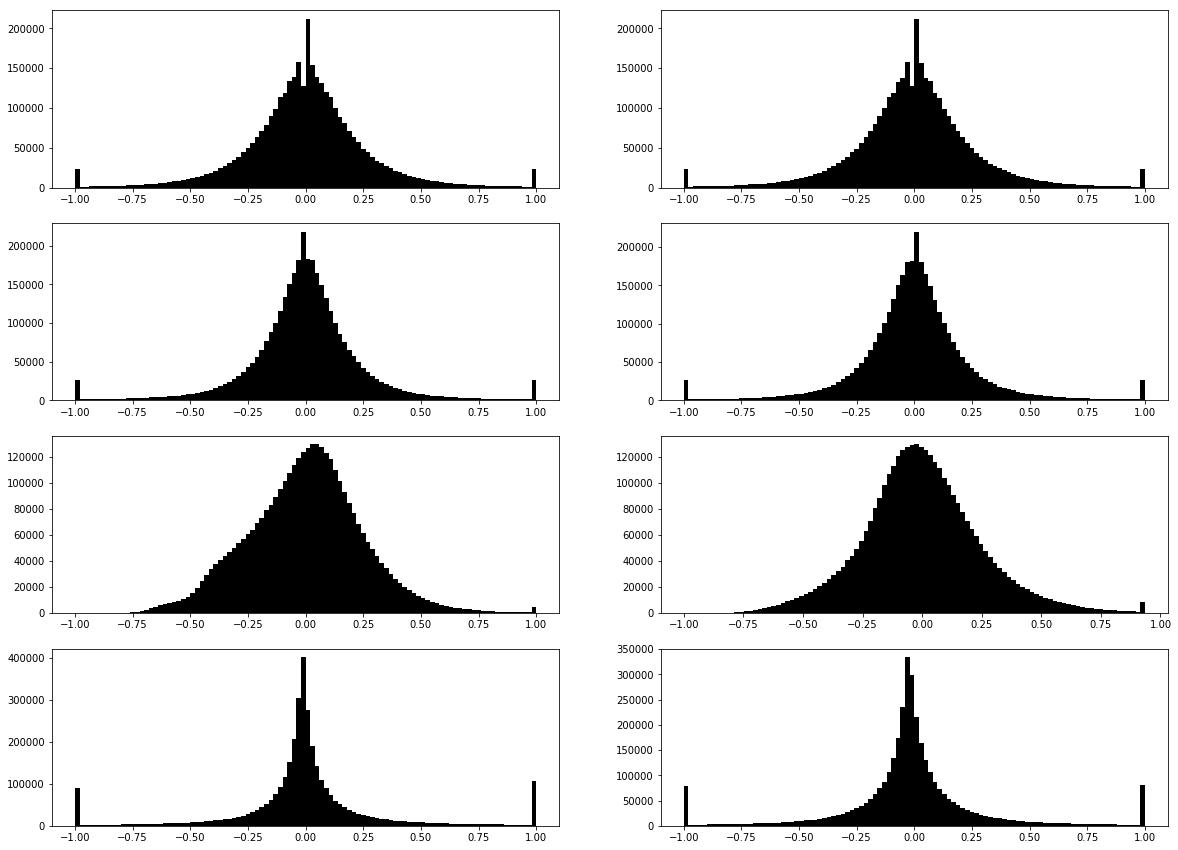

In [94]:
plt.subplots(figsize=(20, 15))
for i in range(8):
  plt.subplot(4,2,i+1)
  if (i==4 or i==5):
    sample=(np.log10(s1_nor[:,:,:,i])-s1_mean[i])/s1_stdd[i]
    sample=np.where(sample>4,4,sample)
    sample=np.where(sample<-4,-4,sample)/4
  elif (i==6 or i==7):
    sample=(s1_nor[:,:,:,i]-s1_mean[i])/s1_stdd[i]
    sample=np.where(sample>0.1,0.1,sample)
    sample=np.where(sample<-0.1,-0.1,sample)*10
  else:
    sample=(s1_nor[:,:,:,i]-s1_mean[i])/s1_stdd[i]
    sample=np.where(sample>3,3,sample)
    sample=np.where(sample<-3,-3,sample)/3
  plt.hist(sample.reshape([-1]), bins=100, color='k')
plt.show()

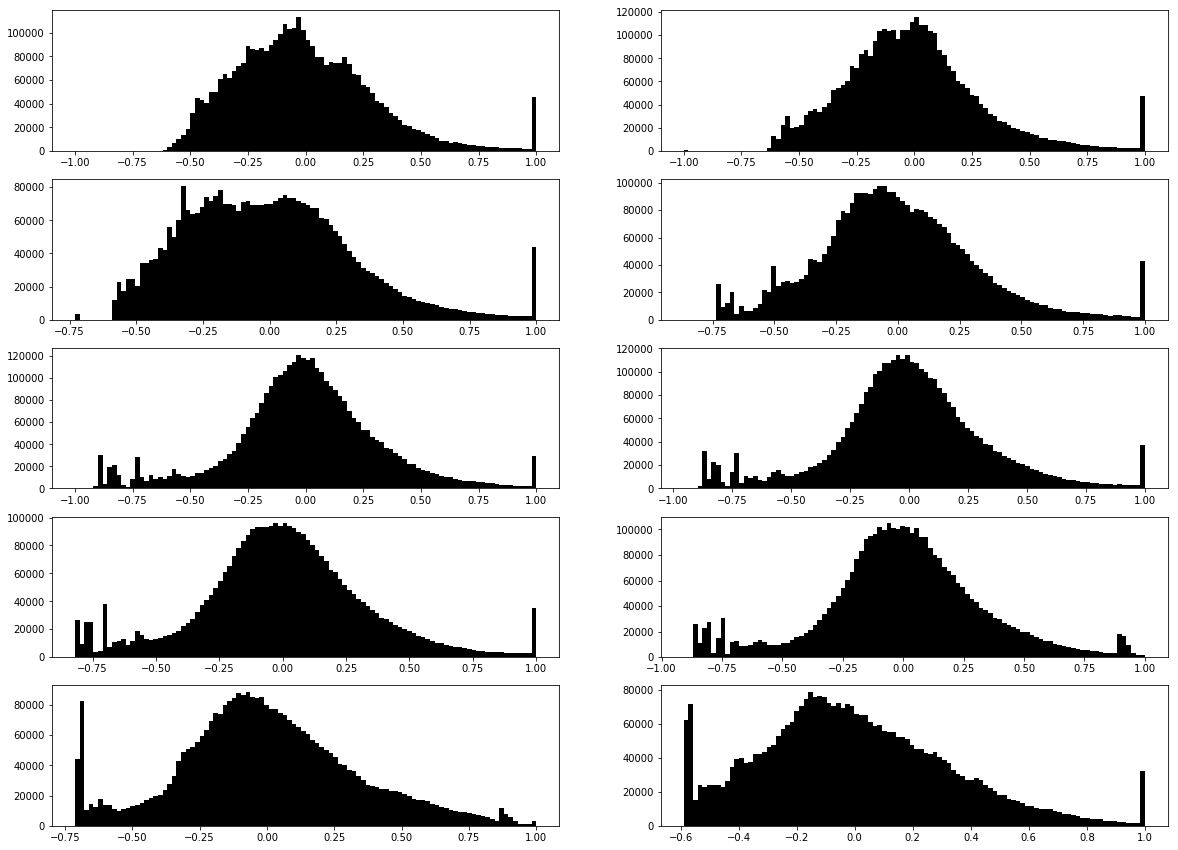

In [95]:
plt.subplots(figsize=(20, 15))
for i in range(10):
  plt.subplot(5,2,i+1)
  sample=(s2_nor[:,:,:,i]-s2_mean[i])/s2_stdd[i]
  sample=np.where(sample>3,3,sample)
  sample=np.where(sample<-3,-3,sample)/3
  plt.hist(sample.reshape([-1]), bins=100, color='k')
plt.show()

-0.004570336321095885 0.24234649288268956
-0.00037457262451145675 0.23533457229101162
-0.0025645836288824943 0.1420934870558165
-0.0074915047473500945 0.1346137366501408
-1.8349162685814835 0.23735558482782532
-2.2070361975342583 0.22408340347093808
-0.0011767934820455658 0.0009488781519921136
-0.002481871284506218 0.0012263042519125825


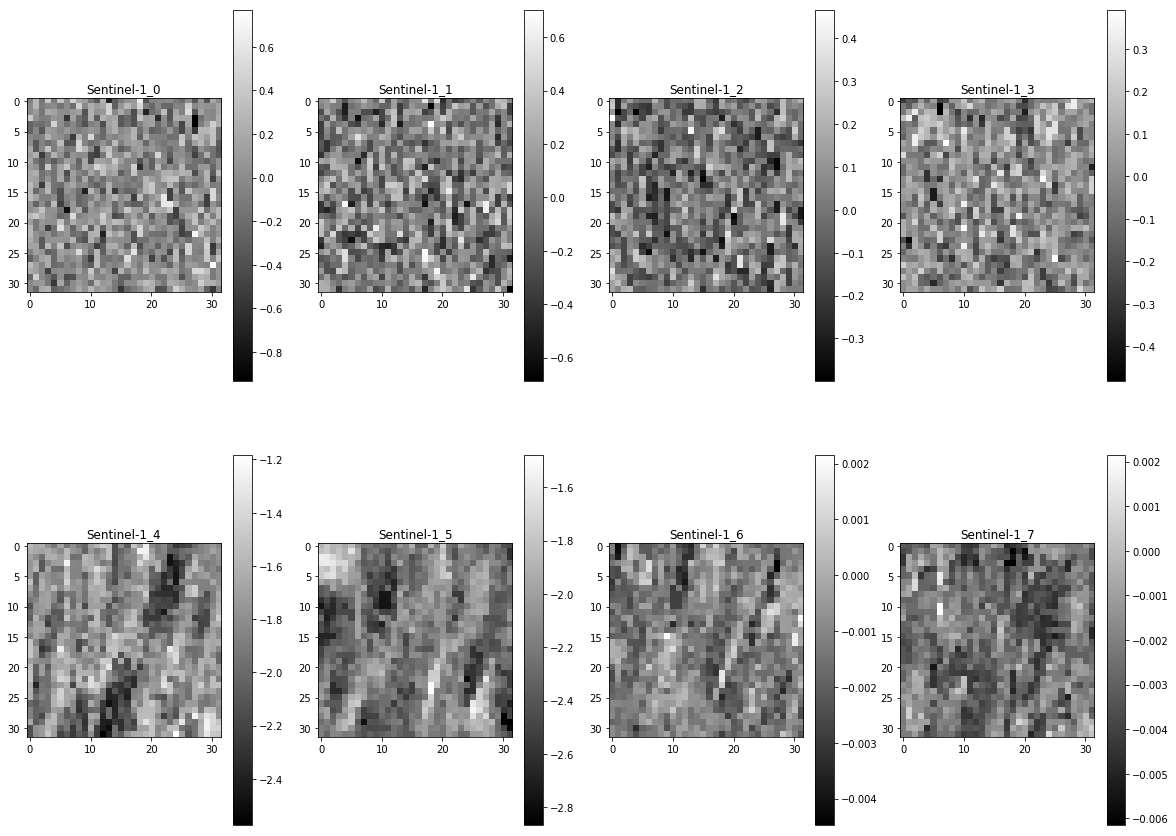

In [48]:
plt.subplots(figsize=(20, 15))

for i in range(8):
  plt.subplot(2,4,i+1)
  if (i>=4 and i<6):
    sample=(np.log10(s1_validation[0,:,:,i])-s1_mean[i])/s1_stdd[i]
    print(np.mean(sample),np.std(sample))
  else:
    sample=(s1_validation[0,:,:,i]-s1_mean[i])/s1_stdd[i]
    print(np.mean(sample),np.std(sample))
  plt.imshow(sample,cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1_%d'%(i))
plt.show()

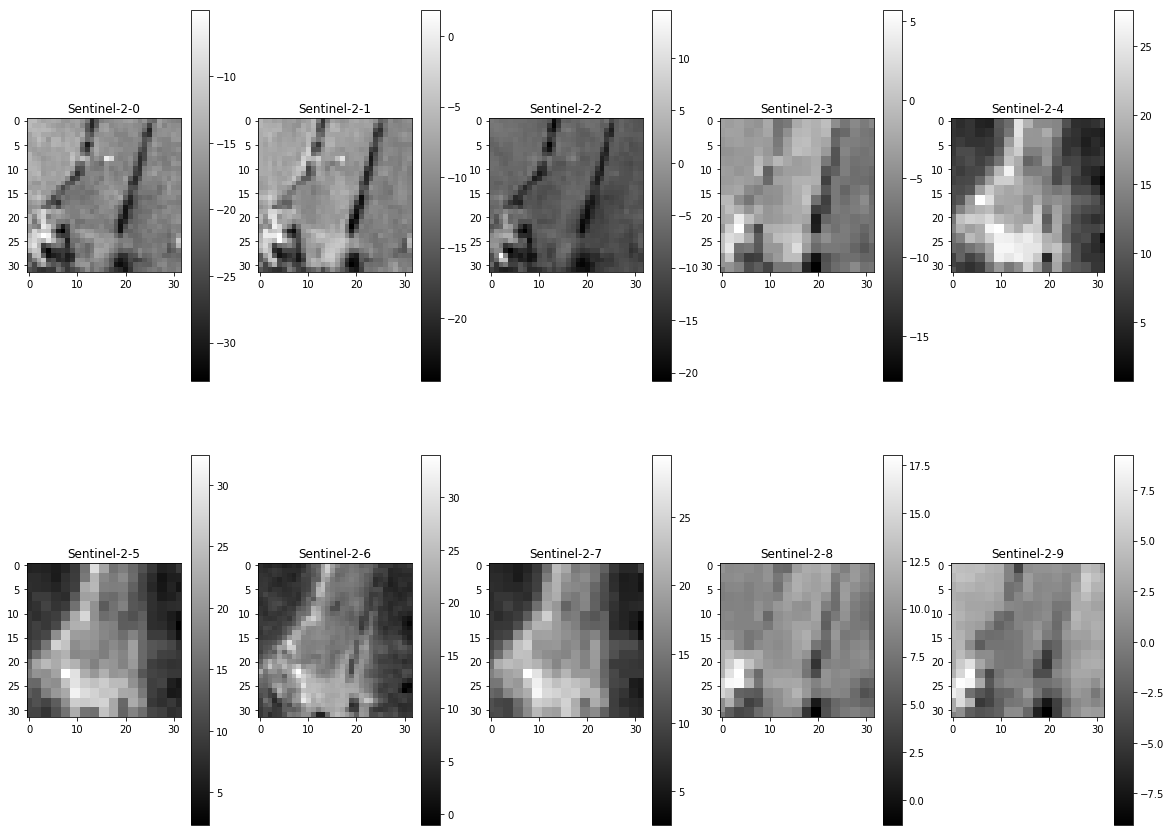

In [38]:
plt.subplots(figsize=(20, 15))

for i in range(10):
  plt.subplot(2,5,i+1)
  sample=(s2_training[9,:,:,i]-s2_mean[i])/s2_stdd[i]
  plt.imshow(sample,cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-2-%d'%(i))
plt.show()

In [ ]:
###############################################################################

In [ ]:
############################################################################

In [ ]:
##########################################################################

In [4]:
s1_ori=np.array(s1_validation).reshape([-1,8])

In [9]:
s1_0=np.where(s1_ori>0., 0., 1.)
(np.sum(s1_0,0)/float(len(s1_0)))

array([0.51297813, 0.51268458, 0.50604563, 0.50625091, 0.        ,
       0.        , 0.49174434, 0.48766071])

In [11]:
s1_0=[]
s1_ori=[]

In [12]:
s1_validation

<HDF5 dataset "sen1": shape (24119, 32, 32, 8), type "<f8">

In [13]:
s1_4=s1_validation[:,:,:,4].reshape([-1])
s1_5=s1_validation[:,:,:,5].reshape([-1])

In [54]:
s1_4a=np.where(s1_4>0.05, 0., 1.)
(np.sum(s1_4a,0)/float(len(s1_4a)))

0.7853795487349186

In [25]:
s1_5a=np.where(s1_5>0.1, 0., 1.)
(np.sum(s1_5a,0)/float(len(s1_5a)))

0.5124001451785937

In [61]:
s2_ori=s2_validation[:,:,:,:].reshape([-1,10])
np.sum(np.where(s2_ori>0.2, 0., 1.),0)/(24119*32*32)

array([0.96461976, 0.96774635, 0.94346999, 0.93856333, 0.76578781,
       0.59286199, 0.62990415, 0.47809931, 0.63551197, 0.82875068])